In [1]:
# Imports
import matplotlib
from matplotlib import pyplot as plt
import sklearn
import numpy as np

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from gaussian_greedy import GaussianGreedy, GaussianGreedyScalable
import torch
import gpytorch


%matplotlib inline

import time

import copy

import pickle as pkl
from generate_data import synthetic_data_kuramoto

# CREATE SYNTHETIC NON-LINEAR DATA

In [2]:

nvars = 10
density = 0.1
T = 500
# graph, samples = synthetic_data_kuramoto(nvars, density, T=T)
# graph = graph[0]
graph = np.load('./data/kuramoto_graph_10.npy')
samples = np.load('./data/kuramoto_samples_10.npy')
samples = samples[:1500]

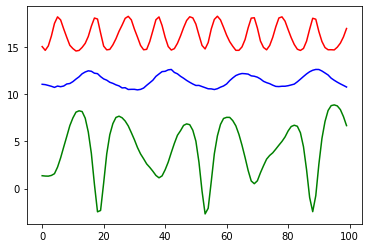

In [3]:
N1 = 400
N2 = 500
plt.plot(samples[N1:N2,0],'r-')
plt.plot(samples[N1:N2,1],'b-')
# plt.ylim([-2.,2])
plt.plot(samples[N1:N2,5],'g-')
# plt.plot(samples[N1:N2,17],'m-')
# plt.plot(samples[N1:N2,10],'k-')
# plt.plot(samples[N1:N2,5],'y-')
# plt.plot(samples[N1:N2,6],'c-')

In [4]:
subsample = 3
dataset = samples.copy()#resample(samples, 5000)
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

dataset = dataset[::subsample]

# SELECT TARGET VARIABLE AND FIND ITS PARENTS

In [5]:
targets = [i for i in range(nvars)]
ground_truth = (graph!=0)*1


# INITIALIZE GaussianForwardBackward


In [6]:
gaussianfb = dict()
phase1_results = dict()
phase2_results = dict()
tau_max = 1
for target in targets:
    gaussianfb[target] = GaussianGreedyScalable(
        selected_variables=[target],
        verbosity=3,
        tau_max = tau_max,
        full_batch=True
    )
    
    phase1_results[target] = gaussianfb[target].run_phase1(dataset, tau_max=tau_max)
    phase2_results[target] = gaussianfb[target].run_phase2(dataset, tau_max=tau_max)
    with open('./results/gaussian_nvars10_phase1_%d.pkl'%target,'wb') as f:
        pkl.dump(phase1_results[target], f)
    with open('./results/gaussian_nvars10_phase2_%d.pkl'%target,'wb') as f:
        pkl.dump(phase2_results[target], f)

selected_variables
verbosity
tau_max
window_shift
##########################
# Starting phase 1 of GaussianForwardBackward
##########################


Parameters:
selected_variables = [0]

tau_min = 1
tau_max = 1



## Variable 0
Planning to run on 4 GPUs.
Number of devices: 4 -- Kernel partition size: 0
Iter 1/1 - Loss: 1.490 lengthscale: ['0.696', '0.695']   noise: 0.735
Finished training on 498 data points using 4 GPUs.
Iter 1/20 - Loss: 1.490 lengthscale: ['0.696', '0.694']   noise: 0.733
Iter 2/20 - Loss: 1.474 lengthscale: ['0.709', '0.715']   noise: 0.816
Iter 3/20 - Loss: 1.465 lengthscale: ['0.735', '0.742']   noise: 0.899
Iter 4/20 - Loss: 1.461 lengthscale: ['0.767', '0.776']   noise: 0.971
Iter 5/20 - Loss: 1.459 lengthscale: ['0.802', '0.796']   noise: 1.006
Iter 6/20 - Loss: 1.458 lengthscale: ['0.846', '0.845']   noise: 1.046
Iter 7/20 - Loss: 1.457 lengthscale: ['0.948', '0.980']   noise: 1.130
Iter 8/20 - Loss: 1.456 lengthscale: ['0.988', '1.007']   noise: 1.116
Iter

		 link X5 --> X0 , S: [], MLL: -698.1512131690979, BIC: -702.9227266833348
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.474 lengthscale: ['0.697', '0.698']   noise: 0.770
Iter 2/20 - Loss: 1.460 lengthscale: ['0.722', '0.704']   noise: 0.891
Iter 3/20 - Loss: 1.457 lengthscale: ['0.738', '0.711']   noise: 0.930
Iter 4/20 - Loss: 1.455 lengthscale: ['0.776', '0.739']   noise: 0.966
Iter 5/20 - Loss: 1.453 lengthscale: ['0.840', '0.805']   noise: 1.011
Iter 6/20 - Loss: 1.449 lengthscale: ['1.222', '1.175']   noise: 1.080
Iter 7/20 - Loss: 1.445 lengthscale: ['1.884', '1.815']   noise: 1.125
Iter 8/20 - Loss: 1.442 lengthscale: ['2.087', '1.952']   noise: 1.080
Iter 9/20 - Loss: 1.440 lengthscale: ['2.193', '2.019']   noise: 1.041
Iter 10/20 - Loss: 1.439 lengthscale: ['2.541', '2.276']   noise: 0.966
Iter 11/20 - Loss: 1.439 lengthscale: ['2.619', '2.359']   noise: 0.986
Iter 12/20 - Loss: 1.437 lengthscale: ['3.429', '3.120']   noise: 1.040
Iter 13/20 - Loss: 1.437 lengthscale: ['3.

/home/bhanu/py36/lib/python3.6/site-packages/numpy/linalg/linalg.py:2125: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


		 link X1 --> X0 , S: [8], MLL: -710.1875967979431, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.466 lengthscale: ['0.693', '0.693', '0.695']   noise: 0.729
Iter 2/20 - Loss: 1.456 lengthscale: ['0.695', '0.702', '0.699']   noise: 0.787
Iter 3/20 - Loss: 1.446 lengthscale: ['0.698', '0.702', '0.734']   noise: 0.889
Iter 4/20 - Loss: 1.444 lengthscale: ['0.697', '0.708', '0.748']   noise: 0.931
Iter 5/20 - Loss: 1.443 lengthscale: ['0.711', '0.713', '0.790']   noise: 1.021
Iter 6/20 - Loss: 1.443 lengthscale: ['0.717', '0.718', '0.799']   noise: 1.010
Iter 7/20 - Loss: 1.438 lengthscale: ['0.864', '0.839', '1.193']   noise: 1.092
Iter 8/20 - Loss: 1.439 lengthscale: ['0.864', '0.839', '1.193']   noise: 1.092
likelihood.noise_covar.raw_noise tensor([0.0267], device='cuda:0')
mean_module.constant tensor([0.0047], device='cuda:0')
covar_module.module.raw_lengthscale tensor([[[-0.0066]],

        [[-0.0059]],

        [[-0.0036]]], device='cuda:0')
Convergence reached!
Finished 

Iter 9/20 - Loss: 1.420 lengthscale: ['1.252', '0.608', '1.149']   noise: 0.865
Iter 10/20 - Loss: 1.418 lengthscale: ['1.471', '0.606', '1.326']   noise: 0.865
Iter 11/20 - Loss: 1.417 lengthscale: ['1.637', '0.594', '1.462']   noise: 0.876
Iter 12/20 - Loss: 1.417 lengthscale: ['1.675', '0.592', '1.494']   noise: 0.876
Iter 13/20 - Loss: 1.417 lengthscale: ['1.695', '0.592', '1.514']   noise: 0.879
Iter 14/20 - Loss: 1.417 lengthscale: ['1.703', '0.592', '1.522']   noise: 0.880
Iter 15/20 - Loss: 1.416 lengthscale: ['1.756', '0.592', '1.578']   noise: 0.887
Iter 16/20 - Loss: 1.416 lengthscale: ['1.882', '0.575', '1.669']   noise: 0.915
Iter 17/20 - Loss: 1.416 lengthscale: ['1.975', '0.573', '1.750']   noise: 0.929
Iter 18/20 - Loss: 1.416 lengthscale: ['1.959', '0.575', '1.750']   noise: 0.926
Iter 19/20 - Loss: 1.415 lengthscale: ['1.953', '0.578', '1.779']   noise: 0.923
Iter 20/20 - Loss: 1.415 lengthscale: ['1.954', '0.577', '1.786']   noise: 0.924
Finished training on 498 data

Iter 19/20 - Loss: 1.115 lengthscale: ['2.185', '7.657']   noise: 0.528
Iter 20/20 - Loss: 1.115 lengthscale: ['2.316', '7.902']   noise: 0.523
Finished training on 498 data points using 4 GPUs.
		 link X3 --> X1 , S: [], MLL: -555.1664700508118, BIC: -558.9204928142194
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 0.251 lengthscale: ['0.750', '0.777']   noise: 0.090
Iter 2/20 - Loss: 0.247 lengthscale: ['0.856', '0.756']   noise: 0.058
Iter 3/20 - Loss: 0.238 lengthscale: ['0.860', '0.754']   noise: 0.064
Iter 4/20 - Loss: 0.233 lengthscale: ['0.895', '0.734']   noise: 0.070
Iter 5/20 - Loss: 0.232 lengthscale: ['0.917', '0.723']   noise: 0.071
Iter 6/20 - Loss: 0.230 lengthscale: ['1.175', '0.624']   noise: 0.082
Iter 7/20 - Loss: 0.229 lengthscale: ['1.133', '0.636']   noise: 0.079
Iter 8/20 - Loss: 0.227 lengthscale: ['1.148', '0.629']   noise: 0.076
Iter 9/20 - Loss: 0.225 lengthscale: ['1.185', '0.603']   noise: 0.070
Iter 10/20 - Loss: 0.225 lengthscale: ['1.215', '0.591']   nois

Iter 7/20 - Loss: 1.132 lengthscale: ['1.421', '1.099']   noise: 0.492
Iter 8/20 - Loss: 1.128 lengthscale: ['1.822', '1.445']   noise: 0.565
Iter 9/20 - Loss: 1.127 lengthscale: ['1.902', '1.493']   noise: 0.554
Iter 10/20 - Loss: 1.126 lengthscale: ['1.964', '1.491']   noise: 0.502
Iter 11/20 - Loss: 1.126 lengthscale: ['2.011', '1.543']   noise: 0.515
Iter 12/20 - Loss: 1.125 lengthscale: ['2.006', '1.559']   noise: 0.529
Iter 13/20 - Loss: 1.125 lengthscale: ['2.007', '1.561']   noise: 0.530
Iter 14/20 - Loss: 1.125 lengthscale: ['2.038', '1.593']   noise: 0.531
Iter 15/20 - Loss: 1.124 lengthscale: ['2.364', '1.955']   noise: 0.545
Iter 16/20 - Loss: 1.123 lengthscale: ['2.737', '2.403']   noise: 0.561
Iter 17/20 - Loss: 1.123 lengthscale: ['2.658', '2.346']   noise: 0.558
Iter 18/20 - Loss: 1.123 lengthscale: ['2.581', '2.328']   noise: 0.555
Iter 19/20 - Loss: 1.122 lengthscale: ['2.348', '2.279']   noise: 0.543
Iter 20/20 - Loss: 1.122 lengthscale: ['2.241', '2.331']   noise: 0

		 link X4 --> X1 , S: [8], MLL: -192.97359895706177, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.185 lengthscale: ['0.701', '0.704', '0.704']   noise: 0.654
Iter 2/20 - Loss: 1.172 lengthscale: ['0.715', '0.759', '0.745']   noise: 0.582
Iter 3/20 - Loss: 1.161 lengthscale: ['0.751', '0.844', '0.817']   noise: 0.527
Iter 4/20 - Loss: 1.149 lengthscale: ['0.896', '1.119', '1.040']   noise: 0.431
Iter 5/20 - Loss: 1.145 lengthscale: ['0.949', '1.212', '1.118']   noise: 0.430
Iter 6/20 - Loss: 1.125 lengthscale: ['1.253', '1.694', '1.547']   noise: 0.496
Iter 7/20 - Loss: 1.121 lengthscale: ['1.384', '1.910', '1.746']   noise: 0.512
Iter 8/20 - Loss: 1.118 lengthscale: ['1.518', '2.120', '1.948']   noise: 0.517
Iter 9/20 - Loss: 1.115 lengthscale: ['1.634', '2.545', '2.289']   noise: 0.527
Iter 10/20 - Loss: 1.114 lengthscale: ['1.689', '2.788', '2.476']   noise: 0.522
Iter 11/20 - Loss: 1.112 lengthscale: ['1.734', '3.101', '2.704']   noise: 0.513
Iter 12/20 - Loss: 1.112 len

Iter 13/20 - Loss: -0.520 lengthscale: ['3.781', '5.659', '2.028', '2.527']   noise: 0.015
Iter 14/20 - Loss: -0.521 lengthscale: ['3.912', '5.949', '1.995', '2.547']   noise: 0.015
Iter 15/20 - Loss: -0.524 lengthscale: ['4.208', '6.801', '1.955', '2.440']   noise: 0.015
Iter 16/20 - Loss: -0.525 lengthscale: ['4.477', '7.645', '1.918', '2.307']   noise: 0.014
Iter 17/20 - Loss: -0.526 lengthscale: ['4.577', '7.976', '1.900', '2.287']   noise: 0.014
Iter 18/20 - Loss: -0.526 lengthscale: ['4.685', '8.371', '1.883', '2.258']   noise: 0.014
Iter 19/20 - Loss: -0.526 lengthscale: ['4.885', '9.099', '1.865', '2.210']   noise: 0.014
Iter 20/20 - Loss: -0.526 lengthscale: ['4.890', '9.333', '1.863', '2.192']   noise: 0.014
Finished training on 498 data points using 4 GPUs.
		 link X0 --> X1 , S: [8, 6], MLL: 260.19747948646545, BIC: 246.3014138886245
Planning to run on 4 GPUs.
Iter 1/20 - Loss: -0.321 lengthscale: ['1.232', '1.241', '1.381', '1.065']   noise: 0.014
Iter 2/20 - Loss: -0.385 

Iter 17/20 - Loss: -0.522 lengthscale: ['4.610', '9.568', '2.041', '2.148']   noise: 0.015
Iter 18/20 - Loss: -0.525 lengthscale: ['4.084', '11.394', '2.208', '2.212']   noise: 0.014
Iter 19/20 - Loss: -0.526 lengthscale: ['4.037', '11.724', '2.180', '2.173']   noise: 0.014
Iter 20/20 - Loss: -0.528 lengthscale: ['3.742', '14.611', '2.078', '1.969']   noise: 0.014
Finished training on 498 data points using 4 GPUs.
		 link X5 --> X1 , S: [8, 6], MLL: 263.2171128988266, BIC: 246.04088716283803
Planning to run on 4 GPUs.
Iter 1/20 - Loss: -0.369 lengthscale: ['1.161', '1.240', '1.183', '1.103']   noise: 0.015
Iter 2/20 - Loss: -0.452 lengthscale: ['1.546', '1.664', '1.663', '1.459']   noise: 0.005
Iter 3/20 - Loss: -0.550 lengthscale: ['1.633', '1.780', '1.808', '1.546']   noise: 0.007
Iter 4/20 - Loss: -0.594 lengthscale: ['1.831', '2.032', '2.064', '1.742']   noise: 0.009
Iter 5/20 - Loss: -0.609 lengthscale: ['1.971', '2.212', '2.167', '1.909']   noise: 0.010
Iter 6/20 - Loss: -0.620 l

Iter 1/20 - Loss: 1.148 lengthscale: ['0.693', '0.693', '0.693', '0.693', '0.693']   noise: 0.694
likelihood.noise_covar.raw_noise tensor([0.1741], device='cuda:0')
mean_module.constant tensor([-0.0888], device='cuda:0')
covar_module.module.raw_lengthscale tensor([[[-0.0453]],

        [[-0.0307]],

        [[-0.0665]],

        [[-0.0261]],

        [[-0.0640]]], device='cuda:0')
Convergence reached!
Finished training on 498 data points using 4 GPUs.
		 link X4 --> X1 , S: [8, 6, 7], MLL: -571.8511698246002, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.206 lengthscale: ['0.705', '0.708', '0.707', '0.699', '0.707']   noise: 0.666
Iter 2/20 - Loss: 0.898 lengthscale: ['1.221', '1.475', '1.372', '0.937', '1.408']   noise: 0.144
Iter 3/20 - Loss: 0.889 lengthscale: ['1.264', '1.541', '1.429', '0.957', '1.469']   noise: 0.129
Iter 4/20 - Loss: 0.801 lengthscale: ['1.471', '1.881', '1.717', '1.050', '1.785']   noise: 0.101
Iter 5/20 - Loss: 0.704 lengthscale: ['1.636', '2.189', '

Iter 1/1 - Loss: 1.247 lengthscale: ['0.691', '0.698']   noise: 0.684
Finished training on 498 data points using 4 GPUs.
Iter 1/20 - Loss: 1.247 lengthscale: ['0.692', '0.696']   noise: 0.686
Iter 2/20 - Loss: 1.245 lengthscale: ['0.682', '0.724']   noise: 0.653
Iter 3/20 - Loss: 1.244 lengthscale: ['0.672', '0.752']   noise: 0.635
Iter 4/20 - Loss: 1.231 lengthscale: ['0.537', '1.588']   noise: 0.602
Iter 5/20 - Loss: 1.230 lengthscale: ['0.534', '1.599']   noise: 0.610
Iter 6/20 - Loss: 1.229 lengthscale: ['0.493', '1.783']   noise: 0.663
Iter 7/20 - Loss: 1.229 lengthscale: ['0.496', '1.790']   noise: 0.656
Iter 8/20 - Loss: 1.227 lengthscale: ['0.485', '1.985']   noise: 0.642
Iter 9/20 - Loss: 1.225 lengthscale: ['0.439', '2.938']   noise: 0.563
Iter 10/20 - Loss: 1.224 lengthscale: ['0.450', '2.823']   noise: 0.576
Iter 11/20 - Loss: 1.223 lengthscale: ['0.470', '2.831']   noise: 0.595
Iter 12/20 - Loss: 1.223 lengthscale: ['0.520', '2.739']   noise: 0.641
Iter 13/20 - Loss: 1.222

Iter 3/20 - Loss: 1.232 lengthscale: ['0.700', '0.656']   noise: 0.586
Iter 4/20 - Loss: 1.232 lengthscale: ['0.699', '0.650']   noise: 0.593
Iter 5/20 - Loss: 1.230 lengthscale: ['0.696', '0.605']   noise: 0.611
Iter 6/20 - Loss: 1.228 lengthscale: ['0.722', '0.533']   noise: 0.615
Iter 7/20 - Loss: 1.226 lengthscale: ['0.800', '0.405']   noise: 0.611
Iter 8/20 - Loss: 1.226 lengthscale: ['0.746', '0.459']   noise: 0.614
Iter 9/20 - Loss: 1.226 lengthscale: ['0.746', '0.459']   noise: 0.614
Iter 10/20 - Loss: 1.225 lengthscale: ['0.768', '0.421']   noise: 0.604
Iter 11/20 - Loss: 1.225 lengthscale: ['0.776', '0.403']   noise: 0.599
Iter 12/20 - Loss: 1.225 lengthscale: ['0.777', '0.398']   noise: 0.597
Iter 13/20 - Loss: 1.225 lengthscale: ['0.741', '0.408']   noise: 0.594
Iter 14/20 - Loss: 1.223 lengthscale: ['0.644', '0.427']   noise: 0.584
Iter 15/20 - Loss: 1.222 lengthscale: ['0.550', '0.442']   noise: 0.571
Iter 16/20 - Loss: 1.222 lengthscale: ['0.538', '0.444']   noise: 0.569

Iter 16/20 - Loss: 1.225 lengthscale: ['0.159', '3.341', '4.221']   noise: 0.642
Iter 17/20 - Loss: 1.223 lengthscale: ['0.145', '4.098', '5.130']   noise: 0.630
Iter 18/20 - Loss: 1.223 lengthscale: ['0.149', '4.278', '5.288']   noise: 0.625
Iter 19/20 - Loss: 1.220 lengthscale: ['0.164', '5.076', '5.978']   noise: 0.608
Iter 20/20 - Loss: 1.219 lengthscale: ['0.165', '5.174', '6.067']   noise: 0.608
Finished training on 498 data points using 4 GPUs.
		 link X1 --> X2 , S: [4], MLL: -607.4290523529053, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.276 lengthscale: ['0.694', '0.698', '0.698']   noise: 0.692
Iter 2/20 - Loss: 1.268 lengthscale: ['0.697', '0.705', '0.706']   noise: 0.688
Iter 3/20 - Loss: 1.267 lengthscale: ['0.717', '0.716', '0.729']   noise: 0.677
Iter 4/20 - Loss: 1.265 lengthscale: ['0.769', '0.776', '0.783']   noise: 0.633
Iter 5/20 - Loss: 1.263 lengthscale: ['0.832', '0.854', '0.850']   noise: 0.611
Iter 6/20 - Loss: 1.258 lengthscale: ['0.955', '0.985',

Iter 8/20 - Loss: 1.242 lengthscale: ['1.193', '2.471', '2.352']   noise: 0.616
Iter 9/20 - Loss: 1.240 lengthscale: ['1.238', '2.579', '2.461']   noise: 0.626
Iter 10/20 - Loss: 1.235 lengthscale: ['1.482', '3.198', '3.052']   noise: 0.657
Iter 11/20 - Loss: 1.234 lengthscale: ['1.614', '3.546', '3.385']   noise: 0.668
Iter 12/20 - Loss: 1.232 lengthscale: ['1.792', '4.031', '3.835']   noise: 0.673
Iter 13/20 - Loss: 1.231 lengthscale: ['1.822', '4.461', '4.234']   noise: 0.673
Iter 14/20 - Loss: 1.227 lengthscale: ['1.839', '8.301', '7.792']   noise: 0.646
Iter 15/20 - Loss: 1.227 lengthscale: ['1.812', '8.397', '7.843']   noise: 0.646
Iter 16/20 - Loss: 1.226 lengthscale: ['1.682', '9.285', '8.474']   noise: 0.644
Iter 17/20 - Loss: 1.225 lengthscale: ['1.435', '11.458', '10.112']   noise: 0.637
Iter 18/20 - Loss: 1.225 lengthscale: ['1.404', '11.953', '10.499']   noise: 0.639
Iter 19/20 - Loss: 1.224 lengthscale: ['1.226', '14.482', '12.491']   noise: 0.644
Iter 20/20 - Loss: 1.224

		 link X2 --> X3 , S: [], MLL: -432.17541110515594, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 0.904 lengthscale: ['0.712', '0.714']   noise: 0.500
Iter 2/20 - Loss: 0.842 lengthscale: ['0.882', '0.909']   noise: 0.162
Iter 3/20 - Loss: 0.800 lengthscale: ['0.853', '0.876']   noise: 0.223
Iter 4/20 - Loss: 0.798 lengthscale: ['0.861', '0.886']   noise: 0.230
Iter 5/20 - Loss: 0.795 lengthscale: ['0.896', '0.928']   noise: 0.237
Iter 6/20 - Loss: 0.789 lengthscale: ['1.037', '0.998']   noise: 0.254
Iter 7/20 - Loss: 0.786 lengthscale: ['1.364', '1.158']   noise: 0.284
Iter 8/20 - Loss: 0.781 lengthscale: ['1.561', '1.278']   noise: 0.279
Iter 9/20 - Loss: 0.774 lengthscale: ['1.865', '1.400']   noise: 0.250
Iter 10/20 - Loss: 0.773 lengthscale: ['2.127', '1.508']   noise: 0.231
Iter 11/20 - Loss: 0.773 lengthscale: ['2.145', '1.522']   noise: 0.234
Iter 12/20 - Loss: 0.772 lengthscale: ['2.385', '1.720']   noise: 0.244
Iter 13/20 - Loss: 0.771 lengthscale: ['2.539', '1.914']

Iter 13/20 - Loss: 0.869 lengthscale: ['2.425', '3.658']   noise: 0.315
Iter 14/20 - Loss: 0.866 lengthscale: ['1.955', '5.091']   noise: 0.308
Iter 15/20 - Loss: 0.866 lengthscale: ['1.832', '5.530']   noise: 0.307
Iter 16/20 - Loss: 0.866 lengthscale: ['1.868', '5.506']   noise: 0.309
Iter 17/20 - Loss: 0.866 lengthscale: ['1.901', '5.511']   noise: 0.311
Iter 18/20 - Loss: 0.866 lengthscale: ['1.910', '5.506']   noise: 0.312
Iter 19/20 - Loss: 0.866 lengthscale: ['1.906', '5.517']   noise: 0.312
Iter 20/20 - Loss: 0.866 lengthscale: ['1.898', '5.525']   noise: 0.311
Finished training on 498 data points using 4 GPUs.
		 link X9 --> X3 , S: [], MLL: -431.16238582134247, BIC: -436.6943524369755
Node X5 added to candidate parents of X3
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 0.815 lengthscale: ['0.724', '0.775', '0.760']   noise: 0.337
Iter 2/20 - Loss: 0.768 lengthscale: ['0.761', '1.041', '0.839']   noise: 0.145
Iter 3/20 - Loss: 0.759 lengthscale: ['0.761', '1.039', '0.835']   n

Iter 13/20 - Loss: 0.694 lengthscale: ['0.960', '5.479', '0.935']   noise: 0.202
Iter 14/20 - Loss: 0.692 lengthscale: ['0.968', '6.233', '0.901']   noise: 0.198
Iter 15/20 - Loss: 0.691 lengthscale: ['0.978', '7.152', '0.864']   noise: 0.194
Iter 16/20 - Loss: 0.689 lengthscale: ['1.017', '10.800', '0.735']   noise: 0.179
Iter 17/20 - Loss: 0.689 lengthscale: ['1.016', '10.771', '0.736']   noise: 0.180
Iter 18/20 - Loss: 0.688 lengthscale: ['1.001', '11.082', '0.744']   noise: 0.181
Iter 19/20 - Loss: 0.688 lengthscale: ['0.994', '11.184', '0.747']   noise: 0.182
Iter 20/20 - Loss: 0.732 lengthscale: ['0.994', '11.184', '0.747']   noise: 0.182
likelihood.noise_covar.raw_noise tensor([-0.0325], device='cuda:0')
mean_module.constant tensor([-0.0017], device='cuda:0')
covar_module.module.raw_lengthscale tensor([[[ 0.0173]],

        [[-0.0004]],

        [[-0.0111]]], device='cuda:0')
Convergence reached!
Finished training on 498 data points using 4 GPUs.
		 link X6 --> X3 , S: [5], MLL:

Iter 14/20 - Loss: 0.505 lengthscale: ['1.603', '5.071', '0.847', '3.817']   noise: 0.120
Iter 15/20 - Loss: 0.505 lengthscale: ['1.608', '5.216', '0.849', '3.898']   noise: 0.121
Iter 16/20 - Loss: 0.505 lengthscale: ['1.603', '5.207', '0.846', '3.890']   noise: 0.121
Iter 17/20 - Loss: 0.505 lengthscale: ['1.610', '5.121', '0.837', '3.830']   noise: 0.122
Iter 18/20 - Loss: 0.505 lengthscale: ['1.634', '4.988', '0.829', '3.741']   noise: 0.122
Iter 19/20 - Loss: 0.505 lengthscale: ['1.635', '4.988', '0.831', '3.726']   noise: 0.121
Iter 20/20 - Loss: 0.505 lengthscale: ['1.641', '4.955', '0.834', '3.674']   noise: 0.120
Finished training on 498 data points using 4 GPUs.
		 link X1 --> X3 , S: [5, 4], MLL: -252.82386767864227, BIC: -266.834544601954
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 0.686 lengthscale: ['0.850', '0.926', '0.897', '0.920']   noise: 0.162
Iter 2/20 - Loss: 0.618 lengthscale: ['1.004', '1.165', '1.023', '1.113']   noise: 0.105
Iter 3/20 - Loss: 0.603 lengthscal

Iter 19/20 - Loss: -0.993 lengthscale: ['0.887', '0.665', '18.636', '19.787']   noise: 0.005
Iter 20/20 - Loss: -0.996 lengthscale: ['0.879', '0.657', '22.570', '23.961']   noise: 0.005
Finished training on 498 data points using 4 GPUs.
		 link X8 --> X3 , S: [5, 4], MLL: 500.4905319213867, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 0.674 lengthscale: ['0.862', '0.945', '0.892', '0.894']   noise: 0.159
Iter 2/20 - Loss: 0.661 lengthscale: ['1.107', '1.329', '0.978', '1.173']   noise: 0.074
Iter 3/20 - Loss: 0.630 lengthscale: ['1.102', '1.341', '0.952', '1.172']   noise: 0.092
Iter 4/20 - Loss: 0.601 lengthscale: ['1.198', '1.516', '0.945', '1.278']   noise: 0.107
Iter 5/20 - Loss: 0.580 lengthscale: ['1.317', '1.756', '0.930', '1.426']   noise: 0.116
Iter 6/20 - Loss: 0.556 lengthscale: ['1.436', '2.544', '0.748', '1.934']   noise: 0.139
Iter 7/20 - Loss: 0.546 lengthscale: ['1.507', '2.882', '0.728', '2.142']   noise: 0.135
Iter 8/20 - Loss: 0.533 lengthscale: ['1.635', '3

Iter 2/20 - Loss: 0.823 lengthscale: ['0.564', '1.133', '1.507', '1.416', '1.570']   noise: 0.137
Iter 3/20 - Loss: 0.801 lengthscale: ['0.538', '1.496', '2.423', '2.198', '2.556']   noise: 0.030
Iter 4/20 - Loss: 0.744 lengthscale: ['0.552', '1.481', '2.435', '2.208', '2.566']   noise: 0.030
Iter 5/20 - Loss: 0.854 lengthscale: ['0.552', '1.481', '2.435', '2.208', '2.566']   noise: 0.030
likelihood.noise_covar.raw_noise tensor([-0.1546], device='cuda:0')
mean_module.constant tensor([0.4326], device='cuda:0')
covar_module.module.raw_lengthscale tensor([[[-0.2292]],

        [[ 0.1558]],

        [[-0.0969]],

        [[-0.0578]],

        [[-0.0843]]], device='cuda:0')
Convergence reached!
Finished training on 498 data points using 4 GPUs.
		 link X8 --> X3 , S: [5, 4, 0], MLL: -382.69330537319183, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.293 lengthscale: ['0.696', '0.719', '0.719', '0.716', '0.720']   noise: 0.680
Iter 2/20 - Loss: 1.256 lengthscale: ['0.709', '0.864', 

Iter 9/20 - Loss: 0.881 lengthscale: ['0.744', '2.320']   noise: 0.193
Iter 10/20 - Loss: 0.879 lengthscale: ['0.764', '2.601']   noise: 0.189
Iter 11/20 - Loss: 0.873 lengthscale: ['0.744', '3.367']   noise: 0.173
Iter 12/20 - Loss: 0.870 lengthscale: ['0.724', '5.388']   noise: 0.146
Iter 13/20 - Loss: 0.867 lengthscale: ['0.755', '5.682']   noise: 0.149
Iter 14/20 - Loss: 0.862 lengthscale: ['0.754', '5.835']   noise: 0.160
Iter 15/20 - Loss: 0.856 lengthscale: ['0.740', '7.080']   noise: 0.169
Iter 16/20 - Loss: 0.854 lengthscale: ['0.765', '8.761']   noise: 0.200
Iter 17/20 - Loss: 0.851 lengthscale: ['0.745', '9.085']   noise: 0.189
Iter 18/20 - Loss: 0.850 lengthscale: ['0.731', '9.593']   noise: 0.182
Iter 19/20 - Loss: 0.849 lengthscale: ['0.715', '10.573']   noise: 0.167
Iter 20/20 - Loss: 0.849 lengthscale: ['0.715', '10.996']   noise: 0.170
Finished training on 498 data points using 4 GPUs.
		 link X0 --> X4 , S: [], MLL: -422.6574912071228, BIC: nan
Planning to run on 4 GP

Iter 14/20 - Loss: 0.402 lengthscale: ['0.574', '2.151']   noise: 0.054
Iter 15/20 - Loss: 0.402 lengthscale: ['0.568', '2.137']   noise: 0.057
Iter 16/20 - Loss: 0.402 lengthscale: ['0.570', '2.137']   noise: 0.057
Iter 17/20 - Loss: 0.402 lengthscale: ['0.578', '2.131']   noise: 0.056
Iter 18/20 - Loss: 0.402 lengthscale: ['0.587', '2.118']   noise: 0.056
Iter 19/20 - Loss: 0.402 lengthscale: ['0.629', '2.030']   noise: 0.057
Iter 20/20 - Loss: 0.402 lengthscale: ['0.624', '2.041']   noise: 0.057
Finished training on 498 data points using 4 GPUs.
		 link X6 --> X4 , S: [], MLL: -200.54191714525223, BIC: nan
Planning to run on 4 GPUs.
Iter 1/20 - Loss: 1.122 lengthscale: ['0.703', '0.709']   noise: 0.523
Iter 2/20 - Loss: 1.021 lengthscale: ['1.010', '1.012']   noise: 0.101
Iter 3/20 - Loss: 0.945 lengthscale: ['0.904', '0.946']   noise: 0.168
Iter 4/20 - Loss: 0.938 lengthscale: ['0.880', '0.975']   noise: 0.174
Iter 5/20 - Loss: 0.912 lengthscale: ['0.791', '1.125']   noise: 0.183
I

ValueError: max() arg is an empty sequence

In [ ]:
print('True parents:{}'.format(true_parents))

In [ ]:
start = time.time()
phase1_results[target] = gaussianfb.run_phase1(dataset, tau_max=gaussianfb.tau_max)
end = time.time()
print(end-start)

In [ ]:
# with open('./temp_gaussian_cpc.pkl','wb') as f:
#     pkl.dump(gaussianfb.CPC, f)
# with open('./temp_gaussian_bic.pkl','wb') as f:
#     pkl.dump(gaussianfb.bic_scores_phase1, f)

with open('./temp_gaussian_cpc.pkl','rb') as f:
    gaussianfb.CPC = pkl.load(f)
with open('./temp_gaussian_bic.pkl','rb') as f:
    gaussianfb.bic_scores_phase1 = pkl.load(f)